In [3]:
import plotly.express as px
import yfinance as yf
import time
from utils import get_current_price, track_current_price, plot_close_price

In [ ]:
print(track_current_price('NVDA',20))

In [8]:
print(get_current_price('NVDA'))

132.50889587402344


In [11]:
plot_close_price('NVDA')

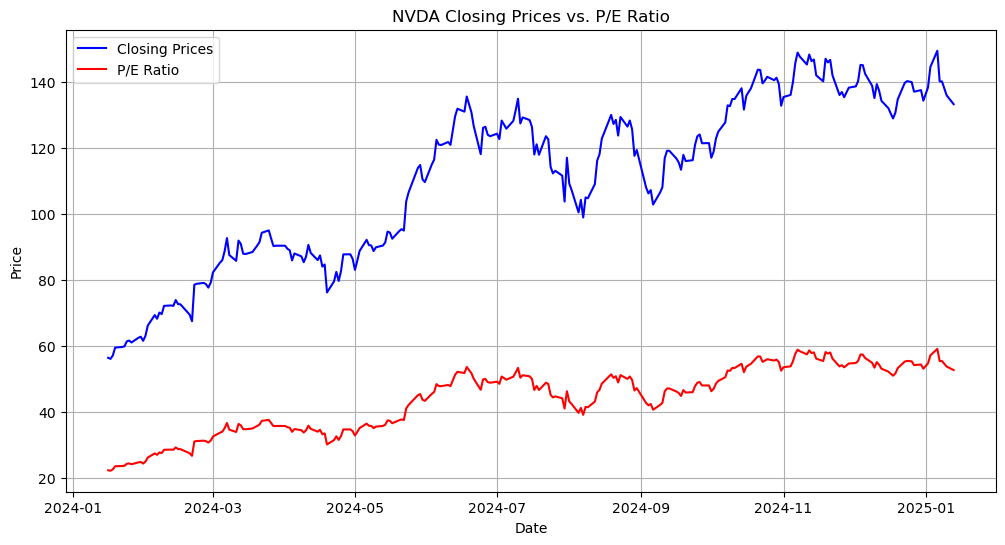

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

def get_pe_ratio(ticker_symbol):
    try:
        # Get stock data for the specified ticker symbol
        stock = yf.Ticker(ticker_symbol)
        
        # Get the historical market data
        data = stock.history(period="1y")
        
        # Calculate the P/E ratio
        data['PE_Ratio'] = data['Close'] / stock.info['trailingEps']
        
        return data
    
    except Exception as e:
        print(f"Error occurred: {e}")
        return None

# Specify the stock ticker symbol for which you want to calculate the P/E ratio and plot
ticker_symbol = "NVDA"  # Example: Apple Inc. stock

# Call the function to get the data
stock_data = get_pe_ratio(ticker_symbol)

if stock_data is not None:
    # Plot the P/E ratio against the closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Close'], label='Closing Prices', color='b')
    plt.plot(stock_data['PE_Ratio'], label='P/E Ratio', color='r')
    
    plt.title(f'{ticker_symbol} Closing Prices vs. P/E Ratio')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
get_pe_ratio("NVDA")

/var/folders/k8/54zwc4911p16cz5tw9zrk4vh0000gn/T/ipykernel_32824/2367753483.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



52.660077362663664